## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

###Importing the Tensor and Keras libararies

In [0]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

###Number of  X_train Samples 

In [0]:
print(x_train.shape)

(60000, 28, 28)


###Number of  X_test Samples 

In [0]:
print(x_test.shape)

(10000, 28, 28)


In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Find dimensions of an image in the dataset

###The train and test data dimensions are:

In [0]:
print("Train Data Dimension (Height x Width) : {0} x {1}".format(x_train.shape[1],x_train.shape[2]))

Train Data Dimension (Height x Width) : 28 x 28


In [0]:
print("Test Data Dimension (Height x Width) : {0} x {1}".format(x_test.shape[1],x_test.shape[2]))

Test Data Dimension (Height x Width) : 28 x 28


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

###Converting Train and Test lables into one hot vectors

In [0]:
num_classes = 10 # No. of unique fashion product
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

###Normalizing the train and test image data by dividing it by 255.

In [0]:
x_train = x_train.astype('float32') / 255


In [0]:
x_test = x_test.astype('float32') / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

###Reshaping the data:

In [0]:
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
#Initialize model, reshape & normalize data
model1 = tf.keras.models.Sequential()

In [0]:
model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2,  activation='relu', input_shape=(28,28,1)))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.3))


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

###Building a model with 2 Conv layers having 32 3x3 filters.

In [0]:
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
#Add - Dense Layer - 128 Nurons with Relu
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Add - Dense Layer/output layer - 10 Nurons with Softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [0]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10,
          batch_size=32,
          callbacks=[earlyStop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0149 - acc: 0.9948 - val_loss: 0.5840 - val_acc: 0.9132
Epoch 2/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0134 - acc: 0.9953 - val_loss: 0.6894 - val_acc: 0.9133
Epoch 3/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0127 - acc: 0.9958 - val_loss: 0.6718 - val_acc: 0.9115
Epoch 4/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0113 - acc: 0.9963 - val_loss: 0.6907 - val_acc: 0.9110
Epoch 5/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0105 - acc: 0.9969 - val_loss: 0.7155 - val_acc: 0.9133
Epoch 6/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0109 - acc: 0.9963 - val_loss: 0.7769 - val_acc: 0.9156
Epoch 00006: early stopping


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

###To the above model adding max pooling layer of filter size 2x2

In [0]:
model2 = tf.keras.models.Sequential()

In [0]:
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Flatten())
#Add - Dense Layer - 128 Nurons with Relu
model2.add(tf.keras.layers.Dense(128, activation='relu'))
#Add - Dense Layer/output layer - 10 Nurons with Softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# compile model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model2.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3788 - acc: 0.8638 - val_loss: 0.2889 - val_acc: 0.8929
Epoch 2/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2430 - acc: 0.9096 - val_loss: 0.2556 - val_acc: 0.9049
Epoch 3/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1932 - acc: 0.9281 - val_loss: 0.2302 - val_acc: 0.9153
Epoch 4/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1552 - acc: 0.9415 - val_loss: 0.2396 - val_acc: 0.9171
Epoch 5/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1283 - acc: 0.9521 - val_loss: 0.2282 - val_acc: 0.9227
Epoch 6/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.1034 - acc: 0.9608 - val_loss: 0.2494 - val_acc: 0.9201
Epoch 7/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0845 - acc: 0.9680 - val_l

### Now, to the above model, lets add Data Augmentation 

###Adding Data Augmentation to the above developed model.

In [0]:
# construct the training image generator for data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
#Create train and test generator
batchsize = 64
train_generator = datagen.flow(x_train,y_train, batch_size=batchsize) #batchsize can be changed
test_generator = datagen.flow(x_test,y_test, batch_size=batchsize)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

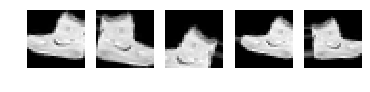

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

###Running the above developed model using fit_generator() function.

In [0]:
model2.fit_generator(train_generator, 
                          epochs=10,
                          validation_data=test_generator)

Epoch 1/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4736 - acc: 0.8245 - val_loss: 0.4572 - val_acc: 0.8341
Epoch 2/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4608 - acc: 0.8303 - val_loss: 0.4381 - val_acc: 0.8368
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4431 - acc: 0.8352 - val_loss: 0.4391 - val_acc: 0.8389
Epoch 4/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4324 - acc: 0.8412 - val_loss: 0.4318 - val_acc: 0.8392
Epoch 5/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4271 - acc: 0.8413 - val_loss: 0.4237 - val_acc: 0.8462
Epoch 6/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4149 - acc: 0.8451 - val_loss: 0.4200 - val_acc: 0.8447
Epoch 7/10
938/938 [==============================] - 18s 19ms/step - loss: 0.4151 - acc: 0.8467 - val_loss: 0.4153 - val_acc: 0.8485
Epoch 8/10
938/938 [==============================] - 18s 19ms

In [0]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

###  Report the final train and validation accuracy

In [0]:
model2_result=model2.evaluate(x_test,y_test,verbose=1)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.3753 - acc: 0.8698


In [0]:
print("Model Accuracy : {0}".format(model2_result[1]*100))

Model Accuracy : 86.97999715805054


In [0]:
print("Model Loss : {0}".format(model2_result[0]))

Model Loss : 0.3752766592383385


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar10.load_data()

In [0]:
print(cifar_x_train.shape)

(50000, 32, 32, 3)


In [0]:
print(cifar_y_train.shape)

(50000, 1)


In [0]:
print(cifar_x_test.shape)

(10000, 32, 32, 3)


In [0]:
np.unique(cifar_y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
np.unique(cifar_y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# construct the training image generator for data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
datagen.fit(cifar_x_train)

In [0]:
cifar_x_train.shape

(50000, 32, 32, 3)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

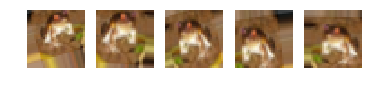

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(cifar_x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype(np.uint8).squeeze())
    plt.plot()
plt.show()